In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import pandas as pd
from IPython.display import *


k=8
p=0.5 
n=200

binom = lambda i : (math.factorial(k)/(math.factorial(k-i)*math.factorial(i)))*(p**i)*((1-p)**(k-i))

Задача 2 

Гусейнов Миран ФН11-53б Вариант 5

### Моделирование и обработка выборки из дискретного закона распределения.

1. Для данного 𝑛 смоделируйте выборку из биномиального закона распределения: $𝑃(𝜉=𝑗)=𝑝_𝑗=𝐶^j_k𝑝^𝑗(1−𝑝)^{𝑘−𝑗},𝑗=\overline{0,𝑘} $.
2. Для полученной выборки постройте статистический ряд. Найдите эмпирическую функцию распределения $\widehat{F}_𝑛(𝑥)$. Постройте на одном рисунке графики 𝐹(𝑥) и $\widehat{F}_𝑛(𝑥)$. Вычислите статистику Колмогорова.
3. Вычислите выборочное среднее и выборочную дисперсию и сравните с истинными значениями этих характеристик.

k=8  p=0.5 n=200

##             Решение

### Смоделируем выборку из биномиального закона распределения

#### 1. Находим теоретический закон 

In [2]:
vec_prob=np.array([binom(i) for i in range(0,k+1)])
print('Вычесляем вероятности по формуле Бернулли \n')
print(vec_prob)

Вычесляем вероятности по формуле Бернулли 

[0.00390625 0.03125    0.109375   0.21875    0.2734375  0.21875
 0.109375   0.03125    0.00390625]


In [3]:
vec_prob2=[]
sum=0
for i in range(k+1):
    sum+=vec_prob[i]
    vec_prob2.append(sum)
print('Кумулятивные вероятности \n')
print(vec_prob2)

Кумулятивные вероятности 

[0.00390625, 0.03515625, 0.14453125, 0.36328125, 0.63671875, 0.85546875, 0.96484375, 0.99609375, 1.0]


In [4]:
pd.DataFrame([range(k+1),vec_prob,vec_prob2],index = ["Значения СВ","Вероятности","Кумулятивные вероятности"],columns =[" " for i in vec_prob])

,,,,,,,,,
Значения СВ,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000
Вероятности,0.003906,0.031250,0.109375,0.218750,0.273438,0.218750,0.109375,0.031250,0.003906
Кумулятивные вероятности,0.003906,0.035156,0.144531,0.363281,0.636719,0.855469,0.964844,0.996094,1.000000


#### 2. Моделируем вектор из  200 случайных чисел

In [11]:
y=np.random.sample(n)
print('Вектор сдучайных велечин от 0 до 1')
pd.DataFrame([[round(i,4) for i in y]])

Вектор сдучайных велечин от 0 до 1


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.3867,0.5964,0.5496,0.1477,0.2159,0.2974,0.8484,0.9893,0.9276,0.8896,...,0.7953,0.0347,0.2521,0.2961,0.0736,0.6933,0.9593,0.283,0.5042,0.8411


#### 3. По вектору из случайных чисел  разыгрываем вектор X в соответсвии с алгоритмом

In [12]:
x=[]
for i in range(n):
    for j in range(k+1):
        if y[i] < vec_prob2[j]:
            x.append(j)
            break
print("Получ вектор X:")
pd.DataFrame([x])

Получ вектор X:


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,4,4,4,3,3,3,5,7,6,6,...,5,1,3,3,2,5,6,3,4,5


#### 4. Строим статистический ряд

,,,,,,,,,
Значение СВ,0.000,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000
Частоты,1.000,6.000,24.000,37.000,59.000,46.000,20.000,6.000,1.000
Относительные частоты,0.005,0.030,0.120,0.185,0.295,0.230,0.100,0.030,0.005
Накопительные частоты,0.005,0.035,0.155,0.340,0.635,0.865,0.965,0.995,1.000


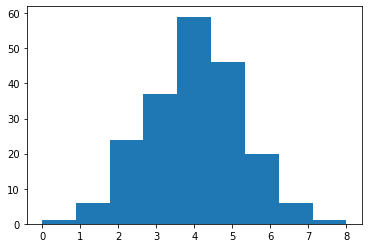

In [37]:
out=plt.hist(x,max(x)-min(x)+1)

sum=0
emp_func=[]
for i in out[0]:
    sum+=i
    emp_func.append(sum/n)
emp_func
  
pd.DataFrame([[i for i in range(len(out[0]))],out[0],out[0]/n,emp_func], index = ["Значение СВ","Частоты","Относительные частоты","Накопительные частоты"],columns =[" " for i in out[0]])

#### 5. Находим эмпирическую функцию распределения и строим совмещенные графики

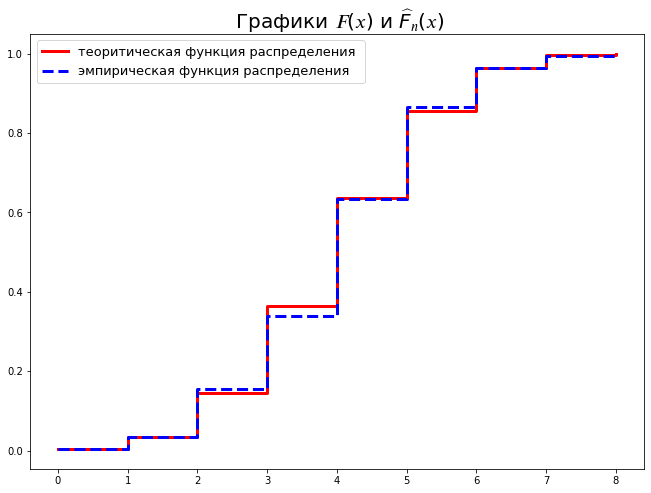

In [49]:
plt.figure(figsize=(11,8))
plt.step(range(len(vec_prob2)),vec_prob2,color='red',where='post',linewidth = 3)
plt.step(range(len(emp_func)),emp_func,'--',color='blue',where='post',linewidth = 3)
plt.legend(['теоритическая функция распределения ','эмпирическая функция распределения '], loc=2, fontsize = 13)
plt.title(r' Графики $𝐹(𝑥)$ и $\widehat{F}_𝑛(𝑥)$',fontsize = 20)
plt.show()

#### 6. Вычисляем статистику Колмогорова:

max( |$𝐹(𝑥)$ - $\widehat{F}_𝑛(𝑥)$| )

In [87]:
vec_k=abs(np.array(vec_prob2)-np.array(emp_func))
print('Статистика Колмогорова:',round(max(vec_k),5))

Статистика Колмогорова: 0.02328


#### 7. Вычисляем выборочное среднее и выборочную дисперсию и сравниваем с истинными значениями этих характеристик.

In [95]:
M=k*p
D=M*(1-p)

M2=np.average(np.array(x))
D2=np.average(np.array(x)**2) - M2**2

pd.DataFrame([[M,M2,round(abs(M-M2),3)],[D,round(D2,3),round(abs(D/D2),3)]],["Матожидание","Дисперсия"],["Теоритическая","Эмпирическая","Разница"])

,Теоритическая,Эмпирическая,Разница
Матожидание,4.0,4.005,0.005
Дисперсия,2.0,1.995,1.003


### Вывод: смоделированая выбока подчиняется биномиальному закону с параметрами k=8  p=0.5 n=200